# Names
- Jackson Paull
- Josh
- Jhanvi Girish

# Problem 1 - Jhanvi

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5.
Create another 1000 samples from another independant Gaussian with mean 10 and standard deviation 5.

(a) Take the sum of these two Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?
(b) Estimate the mean and the variance of the sum.

Part a: The resulting histogram also seems to be normal centered around 0. This is not surprising as the intial two Gaussians were centered around 10 and -10, respectively; their sum would average to the middle (0).

Part b:
Estimated mean is 0.10. 
Estimated variance is 48.03.


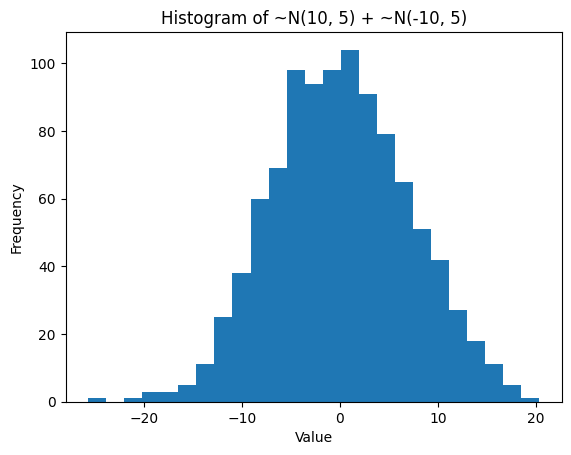

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import decimal as d

def plot_sum (normal1, normal2):
    sum = np.add(normal1, normal2)
    plt.hist(sum, bins = 25)
    plt.title("Histogram of ~N(10, 5) + ~N(-10, 5)")
    plt.ylabel("Frequency")
    plt.xlabel("Value")
    return sum

def variance (sum_data, mean):
    n = len(sum_data) - 1
    sum_dev = 0
    for x in sum_data:
        sum_dev += ((x - mean) ** 2)
    ans = sum_dev / n
    return ans

gaussian_1 = np.random.normal(loc = -10, scale = 5, size = 1000)
gaussian_2 = np.random.normal(loc = 10, scale = 5, size = 1000)

# Part a: Plot sum of two Gaussians
joint_distribution = plot_sum(gaussian_1, gaussian_2)

print("Part a: The resulting histogram also seems to be normal centered around 0. This is not surprising as the intial two Gaussians were centered around 10 and -10, respectively; their sum would average to the middle (0).")

# Part b: Estimate the mean and variance of the sum.
mean = np.sum(joint_distribution)/ len(joint_distribution)
data_var = variance(joint_distribution, mean)

print("\nPart b:\nEstimated mean is {first}. \nEstimated variance is {second}.".format(first=d.Decimal(mean).quantize(d.Decimal('.01'), rounding=d.ROUND_DOWN), second=d.Decimal(data_var).quantize(d.Decimal('.01'), rounding=d.ROUND_DOWN)))

# Problem 2

# Problem 3

# Problem 4 - Jhanvi
Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution
                       | Xi |  ~ N ( | -5 |   | 20   0.8 |
                       | Yi |        |  5 | , | 0.8  30  | )
Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).


In [89]:
import numpy as np
import matplotlib.pyplot as plt

def covariance_estimator(x, y, mean_x, mean_y):
    x_cent = [0 for x in range(len(x))]
    y_cent = [0 for y in range(len(y))]
    i = 0
    for pt in x:
        x_cent[i] = (pt - mean_x)
        i += 1
    i = 0
    for pt in y:
        y_cent[i] = (pt - mean_y)
        i += 1

    d_cent = np.column_stack((x_cent, y_cent))
    d_cent_t = np.transpose(d_cent)
    inverse_n = 1 / (len(d_cent) - 1)
    return (np.matmul(d_cent_t, d_cent)) * inverse_n

mean = [-5, 5]
cov = [[20, 0.8], [0.8, 30]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T

#plt.plot(x, y, '.')

# Estimate the mean
mean_x = np.sum(x) / len(x)
mean_y = np.sum(y) / len(y)

mean_est = [mean_x, mean_y]
print("The estimated mean is", mean_est)

# Estimate the covariance
covariance_est = covariance_estimator(x, y, mean_x, mean_y)
print("The estimated covariance matrix is", covariance_est)

The estimated mean is [-5.058022776683509, 5.052036112564917]
The estimated covariance matrix is [[19.99725712  0.91625404]
 [ 0.91625404 29.81989724]]


# Problem 5